# Loading the folder


In [1]:
#### Load the main folder into colab
#import data from drive

from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME = 'darshanzala/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Mounted at /content/drive


Import all the necessary libraries

In [2]:
### import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
### Read the data
df = pd.read_excel("/content/drive/MyDrive/darshanzala/predictiondata.xlsx")

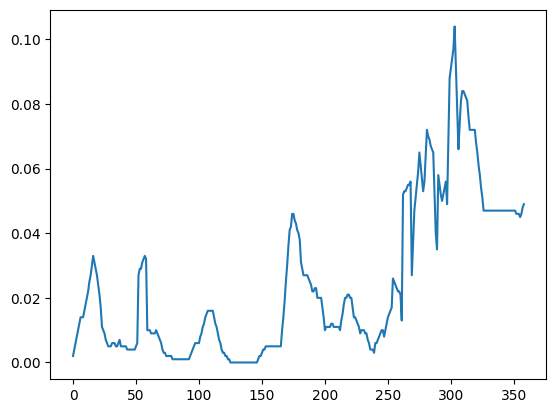

In [4]:
# visualize the data
plt.plot(df['y'])

# Preprocessing the Data

In [5]:
### Preprocess the data splitting the train and test dataset in 80:20 ratio
useLastSevenDays = False
#number of rows and columns.
num_rows, num_columns = df.shape
#manually split train and test data as we need the sequence
split_index = int(len(df) * 0.8)  # Splitting at 80% of the data
if useLastSevenDays == True:
  df_train = df[:-7]
  df_test = df[-7:]
else:
#test train split
  df_train = df[:split_index]
  df_test = df[split_index:]

# def create_lagged_features(series, lag):
#     X = pd.DataFrame()
#     for i in range(lag):
#         X[f"lag_{i+1}"] = series.shift(i+1)
#     return X

# if useLastSevenDays == True:
#   X_train = create_lagged_features(df_train["y"], lag).dropna()
#   y_train = df_train["y"].iloc[lag:]
#   X_test = create_lagged_features(df_test["y"], lag).dropna()
#   y_test = df_test["y"].iloc[lag:]

# # Extract the features and target variable from the data
X_train = df_train[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']]
y_train = df_train['y']

X_test = df_test[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']]
y_test = df_test['y']


In [6]:
y_train.tail()



282    0.070
283    0.069
284    0.067
285    0.066
286    0.065
Name: y, dtype: float64

# Linear Regression


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# # Create a Linear Regression model
model_lr = LinearRegression()

# # Fit the model on the training data
model_lr.fit(X_train, y_train)

# # Once the model is trained, you can use it for prediction
# # Assuming you have a new observation with values for the seven features
mape = []
for i in range(len(y_test)):
  new_observation = pd.DataFrame([X_test.iloc[i]])
  prediction = model_lr.predict(new_observation)
  mse = mean_squared_error([y_test.iloc[i]], [prediction])
  mape.append(mse)

mse_lr_avg = sum(mape)/len(mape)

print('mean square error of testing', mse_lr_avg)

mean square error of testing 0.011924802819799869


# Convolutional Neural Network

In [8]:
###using a cnn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_shape = (X_train.shape[1], 1)  # Assuming X_train has shape (num_samples, num_features)
X_train_reshaped = np.expand_dims(X_train, axis=-1)  # Add an extra dimension for channels

X_test_reshaped = np.expand_dims(X_test, axis=-1)
print(X_train_reshaped.shape)
# Step 2: Create a CNN model
model_cnn = keras.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')
])

# Step 3: Compile and train the model
model_cnn.compile(optimizer='adam', loss='mean_squared_error')
model_cnn.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, verbose=1)

# Step 4: Evaluate the model
mse = model_cnn.evaluate(X_test_reshaped, y_test, verbose=0)
print("Mean Squared Error (MSE):", mse)

(287, 7, 1)
Epoch 1/20
9/9 [==============================] - 1s 4ms/step - loss: 322303552.0000
Epoch 2/20
9/9 [==============================] - 0s 2ms/step - loss: 13901701.0000
Epoch 3/20
9/9 [==============================] - 0s 2ms/step - loss: 31573762.0000
Epoch 4/20
9/9 [==============================] - 0s 3ms/step - loss: 2960039.5000
Epoch 5/20
9/9 [==============================] - 0s 3ms/step - loss: 3846082.5000
Epoch 6/20
9/9 [==============================] - 0s 3ms/step - loss: 1117664.0000
Epoch 7/20
9/9 [==============================] - 0s 3ms/step - loss: 461945.0000
Epoch 8/20
9/9 [==============================] - 0s 2ms/step - loss: 211326.5938
Epoch 9/20
9/9 [==============================] - 0s 3ms/step - loss: 77508.8359
Epoch 10/20
9/9 [==============================] - 0s 2ms/step - loss: 39514.5312
Epoch 11/20
9/9 [==============================] - 0s 3ms/step - loss: 20992.7051
Epoch 12/20
9/9 [==============================] - 0s 3ms/step - loss: 11616.

# Recurrent Neural Network

In [9]:
model_rnn = keras.Sequential([
    layers.LSTM(64, activation='relu', input_shape=input_shape),
    layers.Dense(1)
])

# Step 3: Compile and train the model
model_rnn.compile(optimizer='adam', loss='mean_squared_error')
model_rnn.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, verbose=1)

# Step 4: Evaluate the model
mse_rnn = model_rnn.evaluate(X_test_reshaped, y_test, verbose=0)
print("Mean Squared Error (MSE):", mse_rnn)

Epoch 1/20
9/9 [==============================] - 2s 5ms/step - loss: 28218956.0000
Epoch 2/20
9/9 [==============================] - 0s 5ms/step - loss: 1802413.2500
Epoch 3/20
9/9 [==============================] - 0s 5ms/step - loss: 824922.7500
Epoch 4/20
9/9 [==============================] - 0s 5ms/step - loss: 1004224.8750
Epoch 5/20
9/9 [==============================] - 0s 6ms/step - loss: 156484.6875
Epoch 6/20
9/9 [==============================] - 0s 5ms/step - loss: 114087.5000
Epoch 7/20
9/9 [==============================] - 0s 6ms/step - loss: 10195.5928
Epoch 8/20
9/9 [==============================] - 0s 5ms/step - loss: 13795.9775
Epoch 9/20
9/9 [==============================] - 0s 7ms/step - loss: 6842.8003
Epoch 10/20
9/9 [==============================] - 0s 6ms/step - loss: 953.4288
Epoch 11/20
9/9 [==============================] - 0s 7ms/step - loss: 1433.0770
Epoch 12/20
9/9 [==============================] - 0s 7ms/step - loss: 495.2360
Epoch 13/20
9/9 [====

# ARIMA Model on individual feature

In [10]:
from statsmodels.tsa.arima.model import ARIMA
# As ARIMA is univarient model,  we apply a ARIMA to individual features
features = X_train.columns

for feature in features:
    time_series = X_train[feature]
    order = (2, 1, 2)  # Define the order of the ARIMA model (p, d, q)
    model_ARIMA = ARIMA(time_series, order=order)
    model_ARIMA_fit = model_ARIMA.fit()
    print("Summary for", feature, ":\n", model_ARIMA_fit.summary())



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Summary for x1 :
                                SARIMAX Results                                
Dep. Variable:                     x1   No. Observations:                  287
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2175.452
Date:                Sun, 16 Jul 2023   AIC                           4360.904
Time:                        14:53:14   BIC                           4379.184
Sample:                             0   HQIC                          4368.231
                                - 287                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0136      1.613      0.008      0.993      -3.149       3.176
ar.L2          0.9863      1.614      0.611      0.541      -2.178       4.150
ma.L1         -0.0129      1.613  

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Summary for x5 :
                                SARIMAX Results                                
Dep. Variable:                     x5   No. Observations:                  287
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2097.791
Date:                Sun, 16 Jul 2023   AIC                           4205.581
Time:                        14:53:17   BIC                           4223.861
Sample:                             0   HQIC                          4212.908
                                - 287                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6783      0.050     33.702      0.000       1.581       1.776
ar.L2         -0.8136      0.042    -19.565      0.000      -0.895      -0.732
ma.L1         -0.9877      0.096  

# XGB

In [11]:
import xgboost as xgb

model = xgb.XGBRegressor(
    n_estimators=100,  # Number of trees (boosting rounds)
    max_depth=3,  # Maximum depth of each tree
    learning_rate=0.1,  # Learning rate (shrinkage factor)
    objective='reg:squarederror'  # Objective function for regression
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse_xgb)


Mean Squared Error (MSE): 0.00024358274719826314


# Support Vector Machine

In [12]:
from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(X_train, y_train)
predictions_svr = model_svr.predict(X_test)
mse_svr = mean_squared_error(y_test, predictions_svr)
print("MEan Squared Error (MSE):",mse_svr)


MEan Squared Error (MSE): 0.0007915277777777779
